First we set up our libraries and import the wrangled, cleaned dataset we created:

In [120]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

os.getcwd()

'C:\\Users\\David Olivero\\AnacondaProjects\\Loans-In-Colorado'

In [121]:
df = pd.read_csv('SBA_Model_Input.csv')

df.head().T

,0,1,2,3,4
Name,MICHAEL GADEKEN DDS PC,"MINE TECHNOLOGIES,INC.","CRAIG M. DROSKIN, D.D.S.",Johnny R. Webb II DBA Webb's A,THE DONUT SHOP PLUS
City,Grand Junction,Grand Junction,Grand Junction,Grand Junction,Grand Junction
Bank,WELLS FARGO BANK NATL ASSOC,ANB BANK,WELLS FARGO BANK NATL ASSOC,CAPITAL ONE NATL ASSOC,ANB BANK
BankState,SD,CO,SD,VA,CO
NAICS,621210,333131,621210,811111,0
ApprovalDate,7-Feb-06,7-Mar-97,14-Mar-97,25-Oct-04,16-Apr-97
ApprovalFY,2006,1997,1997,2005,1997
Term,264,60,120,35,60
NoEmp,9,2,4,3,2
NewExist,1,1,1,1,1


#### Dates (Approval and Disbursement) ####
While it's doubtful that the calendar dates of loan approval and loan disbursement will factor into whether or not a loan gets paid off, it would be interesting to factor in how LONG a business had to wait for their loan. IS it possible that the longer one has to wait, the lower the chance of payback? Or perhaps the better the chance?

In [122]:
#  Reset the Approval and Disbursement Date columns in recognizable datetime format.

df.ApprovalDate = pd.to_datetime(df.ApprovalDate)
df.DisbursementDate = pd.to_datetime(df.DisbursementDate)

In [123]:
# Create a new column that hols the difference betwee the two columns, in days:

df['PayDelay'] = df.DisbursementDate - df.ApprovalDate

In [124]:
# Reduce this data form to a simple integer value for # of days. 

for i in range(len(df)):
    df['PayDelay'][i] = df['PayDelay'][i].days

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [125]:
df['PayDelay'] = pd.to_numeric(df['PayDelay'])

In [126]:
df.PayDelay.head(10)

0     52.0
1     85.0
2     47.0
3     98.0
4     45.0
5    101.0
6     18.0
7    110.0
8    140.0
9    227.0
Name: PayDelay, dtype: float64

In [127]:
# A typical loan takes 107 days to be fulfilled, but we shoudl explore the extreme values in this distribution. 

df.PayDelay.describe()

count    19332.000000
mean       107.376474
std        156.698538
min        -10.000000
25%         30.000000
50%         56.000000
75%        115.000000
max       2403.000000
Name: PayDelay, dtype: float64

In [128]:
# Let's investigate the very high values :

df[df.PayDelay > 1500].head().T

,921,989,3415,4016,4137
Name,SUPREME CABLE TECHNOLOGY,"King Kong Building Services, I",AWG FOOD CATERING,"SHOP N SAVE, INC.",COLORADO AIDS PHARMACY
City,Thornton,Denver,Denver,Denver,Denver
Bank,"BANK MIDWEST, A DIVISION OF",WELLS FARGO BANK NATL ASSOC,JPMORGAN CHASE BANK NATL ASSOC,KEYBANK NATIONAL ASSOCIATION,BANK OF THE WEST
BankState,MO,SD,IL,CO,CO
NAICS,314991,0,722211,0,446110
ApprovalDate,1996-07-26 00:00:00,1997-06-13 00:00:00,2002-12-05 00:00:00,1994-12-01 00:00:00,1995-05-03 00:00:00
ApprovalFY,1996,1997,2003,1995,1995
Term,60,84,84,180,60
NoEmp,100,9,4,19,3
NewExist,1,1,1,1,1


In [129]:
# And let's also investigate the negative values :

df[df.PayDelay < 0].head().T

,2614,2633,4451,5845,7662
Name,"PREMIER SECURITY, INC","Huff & Leslie, LLP","FANDANGO,INC.",Trang Thi Ai Tran,"BRAZOS BUILDERS, INC"
City,Denver,Denver,Denver,Aurora,Colorado Springs
Bank,"SUPERIOR FINANCIAL GROUP, LLC",JPMORGAN CHASE BANK NATL ASSOC,FIRSTBANK,WILSHIRE BANK,5 STAR BANK
BankState,CA,IL,CO,CA,CO
NAICS,561612,541110,0,445310,236210
ApprovalDate,2010-06-03 00:00:00,2010-07-13 00:00:00,1996-05-09 00:00:00,2010-03-11 00:00:00,2010-03-11 00:00:00
ApprovalFY,2010,2010,1996,2010,2010
Term,107,84,60,120,60
NoEmp,2,2,3,3,2
NewExist,1,1,2,1,1


In [130]:
# Still, to avoid any strange modeling issues, we will change any values less than 1 day to be 1 day. 
# And any delay values greater than 1000 days to be 1000 days (somewhat arbitrary, admittedly)

df.loc[df['PayDelay'] < 1, ['PayDelay']] = 1
df.loc[df['PayDelay'] > 1000, ['PayDelay']] = 1000


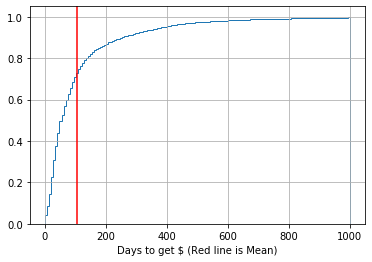

In [131]:
# The resulting distribution. We're now ready to delete the date columns.  

_ = df.PayDelay.hist(bins=150,density=True, histtype='step', cumulative=True)
_ = plt.xlabel('Days to get $ (Red line is Mean)')
_ = plt.axvline(np.mean(df.PayDelay), color='red')
plt.show()

#### Wholesale deletion of a bunch of columns we don't need: ####
First off, we'll get rid of some columns we won't need in our regression efforts.   
1 - Name: Name of Individual  
2 - City: City of Business (we are already importing a lot of couty-specific information to the model)  
3 - Bank: We will assume that the bank the loan is with is not a significant factor.  
4 - BankState: The state of the branch of bank used. Again, assumed to be not significant.  
5 - UrbanRural: By importing a lot of the demographic information by county, we in effect have this data already.  
6 - ChgOffDate: Assume that loan payment performance os not a function of when in the calendar year the loan was charged off.  
7 - BalanceGross: A redundant feature to the loan amount.  
8 - County_Fips: This is just a key column for adding other data.  
9 - County_Name: County name shouldn't matter either.  
10- GrAppv: Gross amount of loan approved by bank - highly correlated to gross disbursement.  
11- SBA_Appv: SBA's guaranteed amount of approved loan - again, highly correlated to gross disbursement.  
12- ChgOffPrinGr: Amount charged off, which will be mostly empty data since most loans get paid off.  
13- ApprovalDate: We will assume that when in the year the loan was approved is not a significant explanatory variable for loan payoff.  
14- DisbursementDate: Similar to approval date, but the calendar date of actual money disbursement.


In [132]:
df = df.drop(columns=['Name', 'City', 'Bank', 'BankState', 'UrbanRural', 'ChgOffDate', 'BalanceGross', \
                      'County_Fips', 'County_Name', 'GrAppv','SBA_Appv', 'ChgOffPrinGr', 'ApprovalDate','DisbursementDate'])

df.head().T

,0,1,2,3,4
NAICS,621210,333131,621210,811111,0
ApprovalFY,2006,1997,1997,2005,1997
Term,264,60,120,35,60
NoEmp,9,2,4,3,2
NewExist,1,1,1,1,1
CreateJob,0,0,0,0,0
RetainedJob,9,0,0,0,0
FranchiseCode,1,1,1,1,1
RevLineCr,0,N,0,N,N
LowDoc,N,Y,N,N,Y


In [4]:
# Here we'll define a function that'll take a look at the test statistic for two proportions,
# To test against a hypothesis that they came from the same binomial distribution.


def props(a_yes, a_no, b_yes, b_no):
    n1 = a_yes + a_no                     # <------Population of first proportion (e.g., standard loans)
    n2 = b_yes + b_no                     # <------Population of 2nd proportion (e.g., low-doc loans)
    p1 = a_yes/n1                         # <------1st proportion
    p2 = b_yes/ n2                         # <------2nd proportion
    p_hat = (n1*p1 + n2*p2)/(n1 + n2)     # <------Combined proportion

    z_stat = (p2 - p1)/np.sqrt(p_hat*(1-p_hat)* (1/n1 + 1/n2))

    return print(n1, n2, p1, p2, p_hat, z_stat)



#### NewExist (and converting it to NewBiz) ##
Next we explore some categorical and discrete variables, and how they relate to loan performance. 'NewExist' is a variable that codes whether the business is new (2) or existing (1):

In [5]:
df.groupby(['NewExist','MIS_Status']).count()['NAICS']

NewExist  MIS_Status
0.0       P I F            17
1.0       CHGOFF         2559
          P I F         12329
2.0       CHGOFF          814
          P I F          3646
Name: NAICS, dtype: int64

For existing businesses, loans get repayed about 82.8% of the time. For new businesses, than number is about 81.7%. So if there is a signal here, it's a pretty weak one. Still, we'll redefine this column as "NewBiz", whether the business is new(1) or not(0). Here well also need to get rid of the 17 rows that don't fit. 

In [6]:
# Let's take a look at the test statistic for these two binomial distributions.

props(12329, 2559, 3646, 814)

# Since z-statistic is less than 2, it's possible that the two proportions came from the same binomial distribution. 

14888 4460 0.8281166039763568 0.8174887892376682 0.8256667355799049 -1.641039444706116


In [7]:
df.NewExist.dtypes

dtype('float64')

In [8]:
# Redefine and rename the NewExist column: new business (1) or not (0): 

df = df[df['NewExist'] >= 1.0]     # <------ Get rid of 17 rows with ambiguous definition

df['NewExist'] = df['NewExist'] - 1        

df = df.rename(columns={'NewExist': 'NewBiz'}) 

In [9]:
# Resulting categorical variable is much cleaner:

df.groupby(['NewBiz','MIS_Status']).count()['NAICS']

NewBiz  MIS_Status
0.0     CHGOFF         2559
        P I F         12329
1.0     CHGOFF          814
        P I F          3646
Name: NAICS, dtype: int64

#### RevLineCr ####
Moving on, we look at 'RevLineCr', which refers to whether or not the loan involved a revolving line of credit. In this case(below), with a revolving line of cerdit, loans get repayed about 67.4% of the time. With no revolving line of credit, loans get repayed about 89.0% of the time. Clearly, this is a significant variable.  
  
  Some cleanup of this variable will be needed. 

In [10]:
df.groupby(['RevLineCr','MIS_Status']).count()['NAICS']

RevLineCr  MIS_Status
0          CHGOFF         935
           P I F         5235
2          P I F            1
5          P I F            1
N          CHGOFF         915
           P I F         7442
T          CHGOFF          28
           P I F           81
Y          CHGOFF        1494
           P I F         3096
Name: NAICS, dtype: int64

In [11]:
# Proportion test assuming 0 is a separate proportion:

props(7442, 915, 3096, 1494)

8357 4590 0.8905109489051095 0.6745098039215687 0.8139337298215803 -30.211665946306276


In [12]:
# We will assume '0' = 'N' & 'T', '2' and '5' = 'Y'

df['RevLineCr'] = df['RevLineCr'].map({'0': 0, 'N': 0, 'Y' : 1, 'T' : 1, '5' : 1, '2' : 1})


In [13]:
df.RevLineCr.value_counts()

0.0    14531
1.0     4702
Name: RevLineCr, dtype: int64

In [14]:
df.groupby(['RevLineCr','MIS_Status']).count()['NAICS']

RevLineCr  MIS_Status
0.0        CHGOFF         1850
           P I F         12677
1.0        CHGOFF         1522
           P I F          3179
Name: NAICS, dtype: int64

In [15]:
# The net is to preserve the dataset size and yield very similar proportions as before:

props(12677, 1850, 3179, 1522)

14527 4701 0.8726509258621876 0.6762390980642417 0.8246307468275431 -30.780607443988522


#### LowDoc ####
Next variable is 'LowDoc', whether the loan is a low-documentation type. 90.7% of Low-Doc loans are repayed, but loans with standard documentation have a 81.5% repayment rate. While this is a big difference, the number of Low-Doc loans in the dataset is not that big, so the effect may not be statistically significant and should be looked at more closely.

In [16]:
df.groupby(['LowDoc','MIS_Status']).count()['NAICS']

LowDoc  MIS_Status
0       CHGOFF            1
        P I F            38
A       CHGOFF            2
        P I F             6
N       CHGOFF         3133
        P I F         13783
S       CHGOFF            2
        P I F             6
Y       CHGOFF          215
        P I F          2106
Name: NAICS, dtype: int64

In [17]:
# Let's take a look at the test statistic for these two binomial distributions.

props(13798, 3134, 2109, 215)

# Since z-statistic is much larger than 2, we conclude the difference in proportions is statistically significant. 

16932 2324 0.8149066855657926 0.907487091222031 0.8260801828001662 11.041360643915272


In [18]:
# To further clean this dataset, we will remove low-doc values of 0, A, and S:

df = df[df.LowDoc != '0'] 
df = df[df.LowDoc != 'A'] 
df = df[df.LowDoc != 'S'] 

df.groupby(['LowDoc','MIS_Status']).count()['NAICS']

LowDoc  MIS_Status
N       CHGOFF         3133
        P I F         13783
Y       CHGOFF          215
        P I F          2106
Name: NAICS, dtype: int64

#### FranchiseCode ####
Franchise is a coding variable for whether or not the business is a franchise, and if so, what franchise it is. Values of 0 or 1 mean the business is not a franchise.

In [19]:
df.FranchiseCode.value_counts()

1        13759
0         4388
78760       51
68020       43
10494       28
         ...  
74750        1
9802         1
4452         1
54400        1
5670         1
Name: FranchiseCode, Length: 385, dtype: int64

In [20]:
Franch = (df.FranchiseCode <= 1)

In [21]:
# We can see that the dataset is overwhelmingly non-franchise businesses, nearly 95%. 
# Hence it's value as an explanatory variable is likely not high. 

Franch.value_counts()

True     18147
False     1151
Name: FranchiseCode, dtype: int64

In [22]:
# Add boolean column to dataset signifying whether or not a franchise: 
df['Franch'] = Franch

In [23]:
df.groupby(['Franch','MIS_Status']).count()['NAICS']

Franch  MIS_Status
False   CHGOFF          193
        P I F           958
True    CHGOFF         3175
        P I F         14967
Name: NAICS, dtype: int64

The proportion of non-franchises that pay their loans in full is 82.5%, compared to 83.0% for franchises. As can be seen below, this difference results in a z-statistic of 0.47, hence there is an excellent chance the two proportions came from the same binomial distribution. 
#### ........As a result, we will drop this categorical variable from the dataset. 

In [24]:
# Let's take a look at the test statistic for these two binomial distributions.

props(14998, 3179, 927,189)

# Since z-statistic is < 2, we conclude the difference in proportions is NOT statistically significant.

18177 1116 0.8251086537932553 0.8306451612903226 0.8254289120406366 0.47293691431195517


In [25]:
# Drop Franchise Code from dataset. 

df = df.drop(columns=['FranchiseCode', 'Franch'])

#### NoEmp ####
NoEmp is a variable that shows the number of employees in an organization. We explore the distribution below:

In [26]:
df.NoEmp.value_counts()

1       3372
2       2988
3       1799
4       1516
5       1260
        ... 
1451       1
76         1
102        1
322        1
191        1
Name: NoEmp, Length: 149, dtype: int64

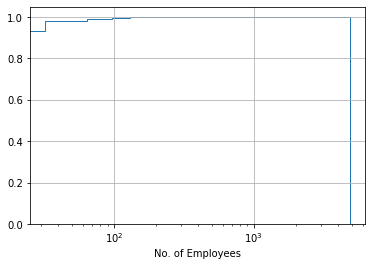

In [27]:
_ = df.NoEmp.hist(bins=150,density=True, histtype='step',cumulative=True)
_ = plt.xlabel('No. of Employees')
#_ = plt.yscale('log')
_ = plt.xscale('log')
plt.show()

The data suggest the vast majority of businesses have fewer than 10 employees. But there are some with hundreds or thousands of employees. For the purposes of our modeling, we can probably just label those as "big" and not dwell on the precise employee count. So let's cut off the distribution at, say, 100; concretely, any value > 100 will be forced to 100. Then we'll re-plot the cdf, which now appears to be an exponential distribution with a mean of 9-10 employees. 

In [28]:
# For simplicity we'll force any emplyee count > 100 to be 100:

df.loc[df['NoEmp'] > 100, ['NoEmp']] = 100

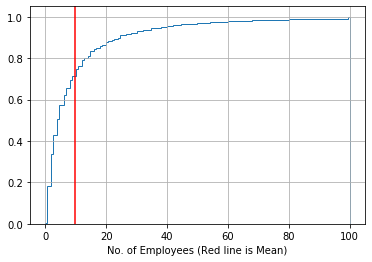

In [29]:
# Plot cdf of employee counts, with a vertical red line at the mean value. 

_ = df.NoEmp.hist(bins=150,density=True, histtype='step',cumulative=True)
_ = plt.xlabel('No. of Employees (Red line is Mean)')
_ = plt.axvline(np.mean(df.NoEmp), color='red')
plt.show()

#### Term ####
We can see in the histogram below that Loan terms vary greatly in the dataset, ranging from less than one year to close to 25 years (data are in months). There are also some clearly common values: 84, 240, 120, 300 and 60 months being the top-five. 

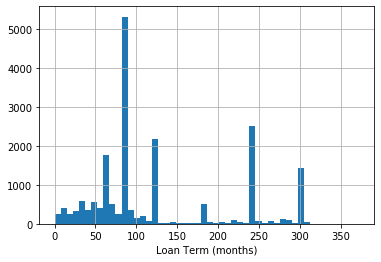

In [30]:
_ = df.Term.hist(bins=50)
_ = plt.xlabel('Loan Term (months)')
plt.show()

In [31]:
df.Term.value_counts(1)

84     0.258265
240    0.128511
120    0.104415
60     0.072132
300    0.071873
         ...   
214    0.000052
198    0.000052
253    0.000052
164    0.000052
261    0.000052
Name: Term, Length: 307, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19298 entries, 0 to 19371
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NAICS               19298 non-null  int64  
 1   ApprovalFY          19298 non-null  int64  
 2   Term                19298 non-null  int64  
 3   NoEmp               19298 non-null  int64  
 4   NewBiz              19298 non-null  float64
 5   CreateJob           19298 non-null  int64  
 6   RetainedJob         19298 non-null  int64  
 7   RevLineCr           19183 non-null  float64
 8   LowDoc              19242 non-null  object 
 9   DisbursementDate    19258 non-null  object 
 10  DisbursementGross   19298 non-null  float64
 11  MIS_Status          19293 non-null  object 
 12  TotalLoansInCounty  19298 non-null  int64  
 13  PIF_RateByCounty    19298 non-null  float64
 14  MedIncome           19298 non-null  int64  
 15  Population          19298 non-null  float64
 16  PopC

#### CreateJob & RetainedJob ####
At first glance, it's not clear how these columns can add significant information compared to what we already have with the NoEmp column. Still we'll take a look. 

In [33]:
# To explore the created and retained job data, we should first transform it the same way we did NoEmp"

df.loc[df['CreateJob'] > 100, ['CreateJob']] = 100
df.loc[df['RetainedJob'] > 100, ['RetainedJob']] = 100

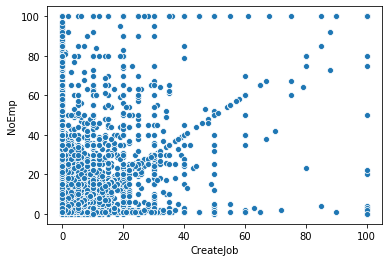

In [36]:
# We several instances of more jobs created than have been declared to exist in the NoEmp data: 

sns.scatterplot(x='CreateJob', y='NoEmp', data=df)

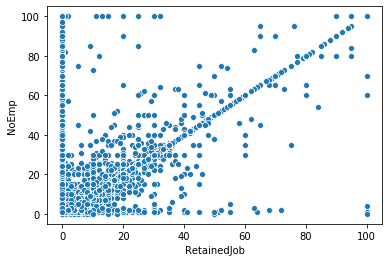

In [38]:
# Similarly, We several instances of more jobs retained than have been declared to exist in the NoEmp data:

sns.scatterplot(x='RetainedJob', y='NoEmp', data=df)

In [48]:
# We create a new column that gets the ratio of created to total jobs. 
# We add 1 to the denominator in the event that there are no employees. 

df['NewHireRatio'] = df.CreateJob / (df.NoEmp + 1)

In [49]:
# Describe tells us that over half of the businesses did not create any new jobs. 

df.NewHireRatio.describe()

count    19298.000000
mean         0.410330
std          1.925447
min          0.000000
25%          0.000000
50%          0.000000
75%          0.253409
max        100.000000
Name: NewHireRatio, dtype: float64

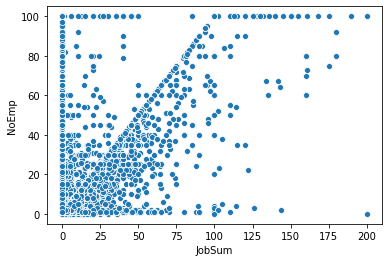

In [41]:

# We create another column called JobSum, summing the created and retained jobs, to compare to the number of total employees:

df['JobSum'] = df.CreateJob + df.RetainedJob

sns.scatterplot(x='JobSum', y='NoEmp', data=df)

In [50]:
print('Created:',np.sum(df.CreateJob),'  Retained:', np.sum(df.RetainedJob),'  Total:', np.sum(df.NoEmp))

Created: 43479   Retained: 85384   Total: 191181


Overall, since these columns seems to add confusion and present us with more questions than answers, I don't think we have much choice but to eliminate them from the dataset:

In [52]:
df = df.drop(columns=['CreateJob', 'RetainedJob','NewHireRatio','JobSum'])

In [54]:
df = df.drop(columns='PctNewHires')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19298 entries, 0 to 19371
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NAICS               19298 non-null  int64  
 1   ApprovalFY          19298 non-null  int64  
 2   Term                19298 non-null  int64  
 3   NoEmp               19298 non-null  int64  
 4   NewBiz              19298 non-null  float64
 5   RevLineCr           19183 non-null  float64
 6   LowDoc              19242 non-null  object 
 7   DisbursementDate    19258 non-null  object 
 8   DisbursementGross   19298 non-null  float64
 9   MIS_Status          19293 non-null  object 
 10  TotalLoansInCounty  19298 non-null  int64  
 11  PIF_RateByCounty    19298 non-null  float64
 12  MedIncome           19298 non-null  int64  
 13  Population          19298 non-null  float64
 14  PopChange           19298 non-null  float64
 15  LaborForceInCty     19298 non-null  int64  
 16  Empl

In [133]:
# Write the resulting DataFrame to csv for storage for later use. 

file_name = 'LIC_Model_Input.csv'
df.to_csv(file_name, encoding='utf-8', index=False)